In [1]:
!git clone https://github.com/ermu2001/nyu_tandon_advanced_machine_learning.git
%cd nyu_tandon_advanced_machine_learning/HW2

Cloning into 'nyu_tandon_advanced_machine_learning'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 91 (delta 28), reused 86 (delta 23), pack-reused 0
Receiving objects: 100% (91/91), 3.00 MiB | 7.61 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nyu_tandon_advanced_machine_learning/HW2


In [2]:
import matplotlib.pyplot as plt

import numpy as np
import torch

from models import ResNetCifar
from datas import get_dataset_cifar10

# Data Set

In [3]:
trainset, trainloader, testset, testloader, classes = get_dataset_cifar10(32)
print(f'training with number of samples {len(trainset)}, number of train dataloader {len(trainloader)}')
print(f'testing with number of samples {len(testset)}, number of test dataloader {len(testloader)}')

100%|██████████| 170498071/170498071 [00:03<00:00, 43476170.16it/s]


Extracting DATAS/cifar-10-python.tar.gz to DATAS
Files already downloaded and verified
training with number of samples 50000, number of train dataloader 1563
testing with number of samples 10000, number of test dataloader 313


# Experiment

In [4]:
def get_model_dtype(model):
    return next(model.parameters()).dtype

def get_model_device(model):
    return next(model.parameters()).device

def train(model, optim):
    num_epoch = 20
    model = model.to('cuda')
    dtype = get_model_dtype(model)
    epoch_eval_losses = []
    epoch_train_avg_losses = []
    epoch_eval_accs = []
    batch_train_losses = []
    losser = torch.nn.CrossEntropyLoss()
    for epoch in range(num_epoch):
        epoch_train_batch_losses = []
        for i, batch in enumerate(trainloader):
            samples, labels = batch
            samples = samples.to('cuda', dtype=dtype)
            labels = labels.to('cuda', dtype=torch.long)
            pred = model(samples)
            loss = losser(pred, labels)
            optim.zero_grad()
            loss.backward()
            optim.step()
            epoch_train_batch_losses.append(loss.item())
        num_samples, correct, eval_loss = 0, 0, 0
        for batch in testloader:
            with torch.no_grad():
                samples, labels = batch
                samples = samples.to('cuda', dtype=dtype)
                labels = labels.to('cuda', dtype=torch.long)
                model_output = model(samples)
                pred = torch.argmax(model_output, dim=-1)
                num_correct = torch.sum(pred == labels)
                num_samples += pred.shape[0]
                correct += num_correct
                eval_loss += torch.nn.functional.cross_entropy(model_output, labels, reduction='none').sum()
            break
        batch_train_losses.extend(epoch_train_batch_losses)
        epoch_train_avg_loss = np.array(epoch_train_batch_losses).mean()
        epch_eval_loss = eval_loss/num_samples
        epoch_eval_acc = correct / num_samples
        epoch_train_avg_losses.append(epoch_train_avg_loss.item())
        epoch_eval_losses.append(epch_eval_loss.item())
        epoch_eval_accs.append(epoch_eval_acc.item())

        print(f'epoch {epoch}, train avg loss {epoch_train_avg_loss.item()}, eval loss {epch_eval_loss.item(): .02f}, eval acc {epoch_eval_acc.item(): .02f}')
    return {
        "epoch_train_avg_losses": epoch_train_avg_losses,
        "batch_train_losses": batch_train_losses,
        "epoch_eval_losses": epoch_eval_losses,
        "epoch_eval_accs": epoch_eval_accs
    }

In [8]:
lr=1e-3
result_dict = {}

# Model

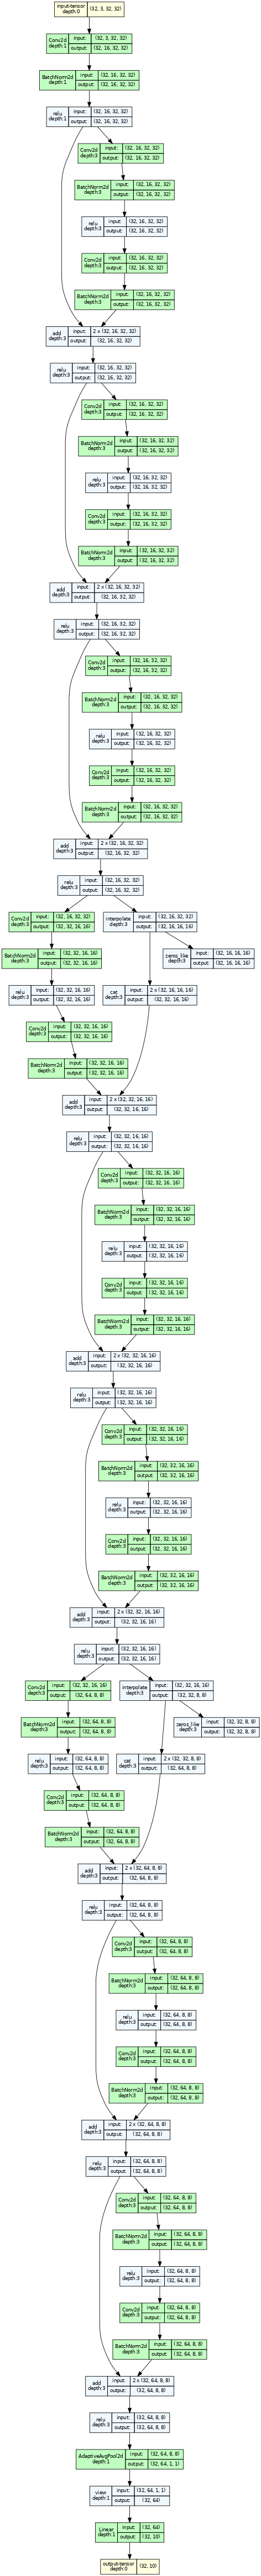

In [ ]:
model = ResNetCifar(n=3)
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')

height, width = 32, 32

# device='meta' -> no memory is consumed for visualization
model_graph = draw_graph(model, input_size=(batch_size, 3, height, width), device='meta')
model_graph.visual_graph

# Train With SGD

In [9]:
model = ResNetCifar(n=3)
optim = torch.optim.SGD(model.parameters(), lr=lr)
results = train(model, optim)
result_dict['sgd'] = results

epoch 0, train avg loss 1.9375546178372336, eval loss  1.51, eval acc  0.44
epoch 1, train avg loss 1.6280142171064098, eval loss  1.32, eval acc  0.56
epoch 2, train avg loss 1.4836427819934779, eval loss  1.21, eval acc  0.56
epoch 3, train avg loss 1.3822066972672138, eval loss  1.15, eval acc  0.62
epoch 4, train avg loss 1.2866884638160296, eval loss  1.07, eval acc  0.59
epoch 5, train avg loss 1.2047274474219032, eval loss  1.02, eval acc  0.66
epoch 6, train avg loss 1.130946184836819, eval loss  1.01, eval acc  0.66
epoch 7, train avg loss 1.0796882534210146, eval loss  0.90, eval acc  0.69
epoch 8, train avg loss 1.0305825852081705, eval loss  0.76, eval acc  0.75
epoch 9, train avg loss 0.9882009264870629, eval loss  0.72, eval acc  0.84
epoch 10, train avg loss 0.9489362223439696, eval loss  0.85, eval acc  0.72
epoch 11, train avg loss 0.916914394858245, eval loss  0.60, eval acc  0.88
epoch 12, train avg loss 0.8818925856323633, eval loss  0.67, eval acc  0.81
epoch 13, t

## Train With Momentum SGD

In [10]:
model = ResNetCifar(n=3)
optim = torch.optim.SGD(model.parameters(),momentum=0.9, lr=lr)
results = train(model, optim)
result_dict['momentum_sgd'] = results

epoch 0, train avg loss 1.5111400435844904, eval loss  0.99, eval acc  0.62
epoch 1, train avg loss 1.1170335105803253, eval loss  0.81, eval acc  0.72
epoch 2, train avg loss 0.9250346679795802, eval loss  0.66, eval acc  0.88
epoch 3, train avg loss 0.8022028467095363, eval loss  0.55, eval acc  0.84
epoch 4, train avg loss 0.7078491668535667, eval loss  0.48, eval acc  0.88
epoch 5, train avg loss 0.6373337188345914, eval loss  0.55, eval acc  0.84
epoch 6, train avg loss 0.5763200767343043, eval loss  0.48, eval acc  0.91
epoch 7, train avg loss 0.5285320704134321, eval loss  0.48, eval acc  0.88
epoch 8, train avg loss 0.48958874325091, eval loss  0.55, eval acc  0.88
epoch 9, train avg loss 0.4488320087421726, eval loss  0.33, eval acc  0.91
epoch 10, train avg loss 0.4162083082258587, eval loss  0.48, eval acc  0.88
epoch 11, train avg loss 0.3838832292727225, eval loss  0.42, eval acc  0.91
epoch 12, train avg loss 0.3568990369823714, eval loss  0.47, eval acc  0.88
epoch 13, t

## Train With Adam

In [11]:
model = ResNetCifar(n=3)
optim = torch.optim.Adam(model.parameters())
results = train(model, optim)
result_dict['adam'] = results

epoch 0, train avg loss 1.3034343889944842, eval loss  0.83, eval acc  0.72
epoch 1, train avg loss 0.8768626912732347, eval loss  0.57, eval acc  0.84
epoch 2, train avg loss 0.7098958507723634, eval loss  0.49, eval acc  0.81
epoch 3, train avg loss 0.6107170919977696, eval loss  0.48, eval acc  0.88
epoch 4, train avg loss 0.5357499930218711, eval loss  0.49, eval acc  0.81
epoch 5, train avg loss 0.46941016989587897, eval loss  0.51, eval acc  0.81
epoch 6, train avg loss 0.42057542153470273, eval loss  0.50, eval acc  0.84
epoch 7, train avg loss 0.36940276811539324, eval loss  0.35, eval acc  0.91
epoch 8, train avg loss 0.3296459292824918, eval loss  0.45, eval acc  0.88
epoch 9, train avg loss 0.2941544052268249, eval loss  0.55, eval acc  0.84
epoch 10, train avg loss 0.2554524278915317, eval loss  0.54, eval acc  0.84
epoch 11, train avg loss 0.22608113837662563, eval loss  0.63, eval acc  0.81
epoch 12, train avg loss 0.20177009016971365, eval loss  0.48, eval acc  0.88
epoc

# Plotting the results

In [17]:
def smooth(seq, windowsize=10):
  smoothed = []
  for i in range(len(seq)):
    subseq = seq[i:i+windowsize]
    smoothed.append(sum(subseq) / windowsize)

  return smoothed

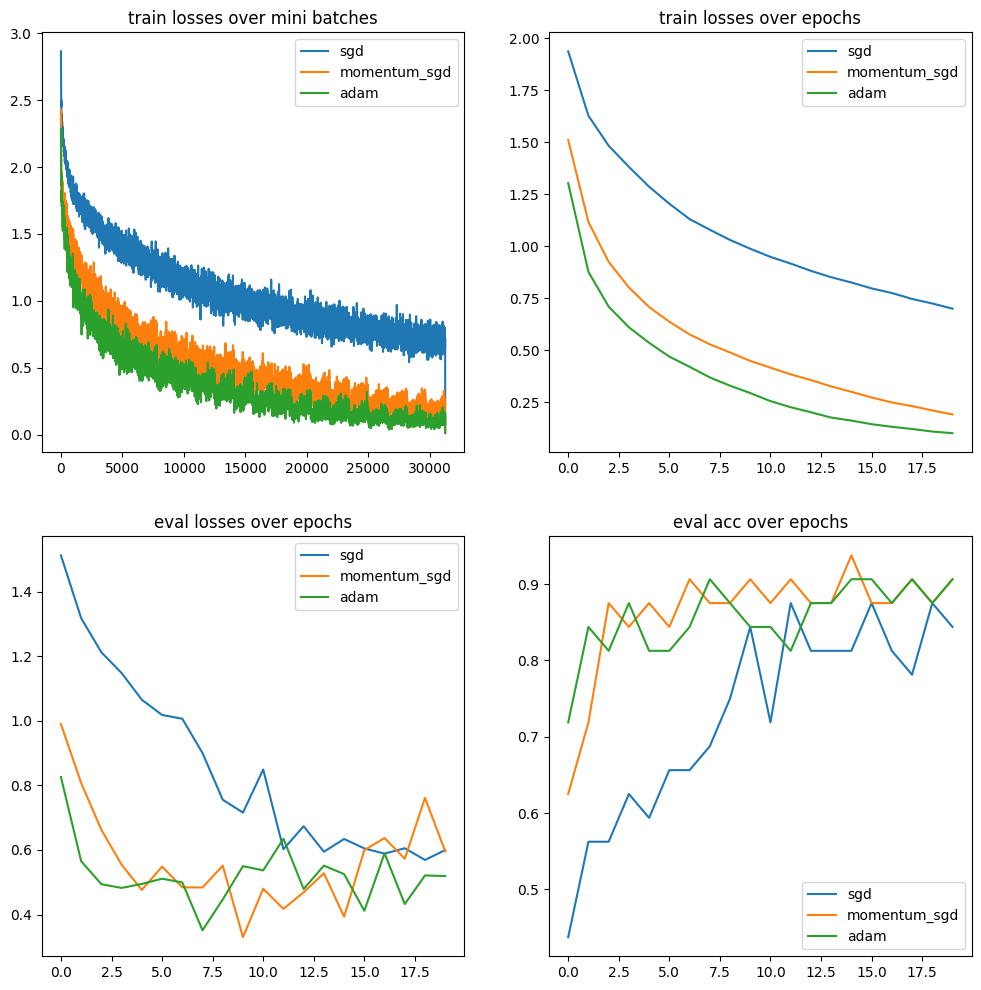

In [18]:
figure, axeses = plt.subplots(2, 2, figsize=(12,12),)
axeses = axeses.flatten()


for i, (exp_name, results) in enumerate(result_dict.items()):
  epoch_train_avg_losses = results["epoch_train_avg_losses"]
  batch_train_losses = smooth(results["batch_train_losses"])
  epoch_eval_losses = results["epoch_eval_losses"]
  epoch_eval_accs = results["epoch_eval_accs"]

  axeses[0].plot(range(len(batch_train_losses)), batch_train_losses, label=exp_name)
  axeses[1].plot(range(len(epoch_train_avg_losses)), epoch_train_avg_losses, label=exp_name)
  axeses[2].plot(range(len(epoch_eval_losses)), epoch_eval_losses, label=exp_name)
  axeses[3].plot(range(len(epoch_eval_accs)), epoch_eval_accs, label=exp_name)

axeses[0].set_title("train losses over mini batches")
axeses[1].set_title("train losses over epochs")
axeses[2].set_title("eval losses over epochs")
axeses[3].set_title("eval acc over epochs")

axeses[0].legend()
axeses[1].legend()
axeses[2].legend()
axeses[3].legend()
# plt.legend()
plt.show()
